load the dataset

In [3]:
import pandas as pd
test = pd.read_csv('test.csv')
train = pd.read_csv('training.csv')
valid = pd.read_csv('validation.csv')



## Data exploration

In [6]:
data = [test, train, valid]
for i in data:
    print (i.shape)
    print(i.sample(5))
    print(i.head())

(2000, 2)
                                                   text  label
1904  i feel is an acceptable and significant modern...      1
1549  i feel like my fish might be moderately more i...      1
1605  i feel like everythings going to happen with o...      0
318                      i am feeling crampy and cranky      3
1779  i have some great friends and great housemates...      0
                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0
(16000, 2)
                                                   text  label
3826  i feel like im actually doing somewhat well wi...      1
1206  i feel stupid and incapable and i dont know wh...      0
9918  i feel relieved when i don t have to play jeof

tweet id column serves no function, so i drop it

In [8]:
for i in data:
    print(i['label'].value_counts())

label
1    695
0    581
3    275
4    224
2    159
5     66
Name: count, dtype: int64
label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64
label
1    704
0    550
3    275
4    212
2    178
5     81
Name: count, dtype: int64


#### Visualization of the results

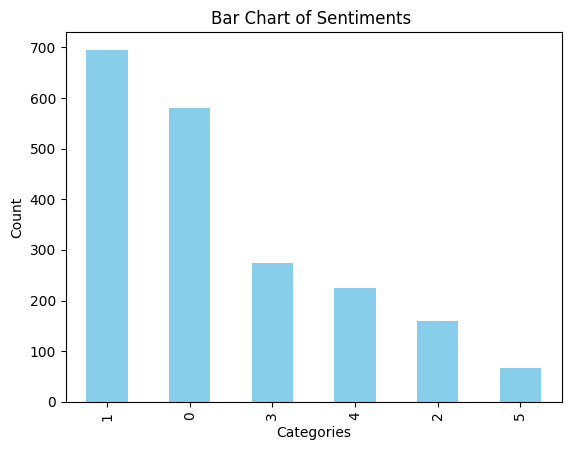

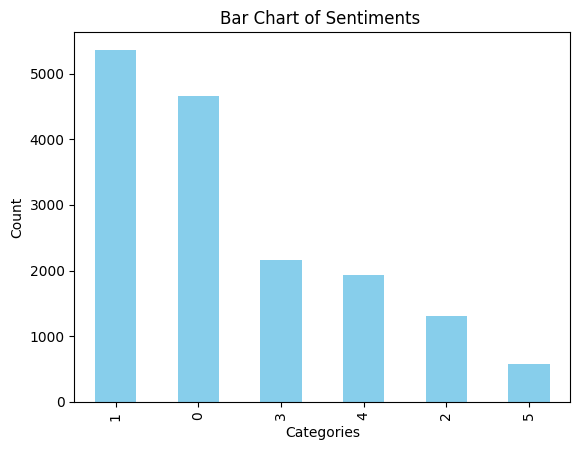

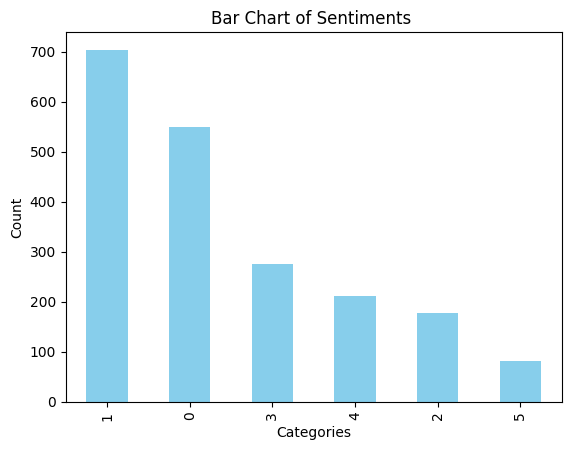

In [9]:
import matplotlib.pyplot as plt
for i in data:
    i['label'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Bar Chart of Sentiments ')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.show()


In [10]:
for i in data:
        print(i['label'].isnull().sum())
        
        i['text'].isnull().sum()



0
0
0


#### Convert text to lowercase, remove stopwords, punctuation, numbers, and unnecessary whitespace


In [11]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))  
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)
for i in data:
    
    i['text'] = i['text'].apply(clean_text)


In [13]:
for i in data:
 for column in i:
    print(column)
    print(f'{column}:{i[column].unique()}')

text
text:['im feeling rather rotten im ambitious right'
 'im updating blog feel shitty'
 'never make separate ever want feel like ashamed' ...
 'feel useful people gives great feeling achievement'
 'im feeling comfortable derby feel though start step shell'
 'feel weird meet w people text like dont talk face face w']
label
label:[0 1 4 3 2 5]
text
text:['didnt feel humiliated'
 'go feeling hopeless damned hopeful around someone cares awake'
 'im grabbing minute post feel greedy wrong' ...
 'feel strong good overall' 'feel like rude comment im glad'
 'know lot feel stupid portray']
label
label:[0 3 2 5 4 1]
text
text:['im feeling quite sad sorry ill snap soon'
 'feel like still looking blank canvas blank pieces paper'
 'feel like faithful servant' ...
 'feel important share info experience thing'
 'truly feel passionate enough something stay true succeed'
 'feel like wan na buy cute make see online even one']
label
label:[0 2 3 1 4 5]



### Sentiments and values the represent
##### anger = 0
##### boredom = 1
##### empty = 2
##### enthusiasm = 3
##### fun = 4
##### happiness = 5
##### hate = 6
##### love = 7
##### neutral = 8
##### relief = 9
##### sadness = 10
##### surprise = 11
##### worry = 12

In [14]:
x_test = test['text']
y_test = test['label']


In [15]:
x_train = test['text']
y_train = test['label']

In [16]:
x_valid = test['text']
y_valid = test['label']

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
x_train_tv = vectorizer.fit_transform(x_train)

x_test_tv = vectorizer.transform(x_test)
x_valid_tv = vectorizer.transform(x_valid)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import json

In [26]:
clf = LogisticRegression(solver="lbfgs",max_iter=200)

In [27]:
clf.fit(x_train_tv,y_train)


LogisticRegression(max_iter=200)

In [29]:
y_test_pred = clf.predict(x_test_tv)


In [30]:
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94       581
           1       0.80      1.00      0.89       695
           2       1.00      0.38      0.55       159
           3       1.00      0.88      0.93       275
           4       0.96      0.79      0.87       224
           5       1.00      0.09      0.17        66

    accuracy                           0.88      2000
   macro avg       0.94      0.69      0.72      2000
weighted avg       0.90      0.88      0.86      2000



In [32]:
y_valid_pred = clf.predict(X_valid_tv)


In [33]:
print(classification_report(y_valid,y_valid_pred))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94       581
           1       0.80      1.00      0.89       695
           2       1.00      0.38      0.55       159
           3       1.00      0.88      0.93       275
           4       0.96      0.79      0.87       224
           5       1.00      0.09      0.17        66

    accuracy                           0.88      2000
   macro avg       0.94      0.69      0.72      2000
weighted avg       0.90      0.88      0.86      2000



In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# List of models to train
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Train and evaluate each model
for name, model in models:
    # Train the model
    model.fit(x_train_tv, y_train)
    # Predict on the test set
    y_pred = model.predict(x_test_tv)
    # Evaluate the model
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8765
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       581
           1       0.80      1.00      0.89       695
           2       1.00      0.38      0.55       159
           3       1.00      0.88      0.93       275
           4       0.96      0.79      0.87       224
           5       1.00      0.09      0.17        66

    accuracy                           0.88      2000
   macro avg       0.94      0.69      0.72      2000
weighted avg       0.90      0.88      0.86      2000

Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       581
           1       1.00      1.00      1.00       695
           2       1.00      1.00      1.00       159
           3       1.00      1.00      1.00       275
           4       1.00      1.00      1.00       224
           5       1.00      1.00      1.00        66

    accuracy

In [49]:
model = RandomForestClassifier(random_state = 0)
modelt = SVC()

In [40]:
model.fit(x_train_tv, y_train)
model.score(x_test_tv, y_test)


1.0

In [50]:
modelt.fit(x_train_tv, y_train)
modelt.score(x_test_tv, y_test)


0.989

In [42]:
import pickle
pickle.dump(model, open('emotion.pkl','wb'))

In [46]:
pickle.dump(vectorizer, open("vectorizer.pkl","wb"))


In [45]:
clf = pickle.load(open("emotion.pkl","rb"))


In [51]:
pickle.dump(modelt, open('emotiont.pkl','wb'))

In [ ]:
 sadness (0), joy (1), love (2), anger (3), fear (4).